In [19]:
import os
import glob
import pydicom
import numpy as np
import nibabel as nib
root = '/Users/mona/Documents/data/registration/Lisbon/Lisbon_D8/PostconT1w'

subjects = glob.glob(f"{root}/*")
output = '/Users/mona/Documents/data/registration/Lisbon/Lisbon_D8/PostconT1w_nii'
os.makedirs(output, exist_ok=True)

PixelSpacing = None
for subject in subjects:
    imas = glob.glob(os.path.join(root, subject, '*.IMA'))
    vols = []
    for ima in imas:
        img = pydicom.read_file(ima)
        vols.append(img.pixel_array)
        if PixelSpacing is None:
            pix = np.array(img.PixelSpacing).astype(np.float32) 
            sli = np.array(img.SliceThickness).astype(np.float32)
            PixelSpacing = np.array([pix[0], pix[1], sli])
    vols = np.stack(vols, axis=-1)
    affine = np.diag(np.concatenate([PixelSpacing, [1]]))
    ni_img = nib.Nifti1Image(vols, affine)
    nib.save(ni_img, os.path.join(output, f"{subject}_T1w.nii"))

In [24]:
a = np.load('/Users/mona/Documents/repo/voxelmorph-test/data/PostconT1w_dataset/train/POSTCON2_T1MAP_SAX5_0.npy')

(192, 164, 8)


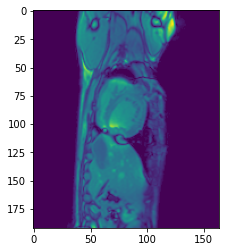

In [27]:
import matplotlib.pyplot as plt
print(a.shape)
plt.imshow(a[:,:,1])